# Data Loading

In [1]:
!wget --no-check-certificate 'https://archive.ics.uci.edu/static/public/19/car+evaluation.zip' -O car_evaluation_dataset.zip

--2025-05-17 15:48:29--  https://archive.ics.uci.edu/static/public/19/car+evaluation.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘car_evaluation_dataset.zip’

car_evaluation_data     [ <=>                ]   6.19K  --.-KB/s    in 0s      

2025-05-17 15:48:30 (66.5 MB/s) - ‘car_evaluation_dataset.zip’ saved [6342]



In [2]:
!unzip /content/car_evaluation_dataset.zip

Archive:  /content/car_evaluation_dataset.zip
  inflating: car.c45-names           
  inflating: car.data                
  inflating: car.names               


### Deskripsi dataset :

**car.data** : File utama yang akan digunakan dalam proses loading dan seluruh pipeline proyek

**car.names** : File yang berguna untuk memahami arti dari setiap kolom dan nilai-nilainya

**car.c45-names** : File dalam format yang digunakan oleh **c4.5**, yaitu sebuah algoritma decision tree klasik, yang sekarang lebih dikenal dalam tools seperti **We

In [3]:
import pandas as pd

# -----------------------------------
# 1. Membaca data utama dari car.data
# -----------------------------------

# Menentukan nama kolom sesuai dokumentasi car.names
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Membaca file car.data secara lokal
data_car = pd.read_csv('car.data', names=columns)

# Menampilkan 5 baris pertama sebagai contoh
print("Contoh isi data:")
print(data_car.head())

Contoh isi data:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [4]:
# -----------------------------------
# 2. Membaca dokumentasi dari car.names
# -----------------------------------

try:
    with open('car.names', 'r') as file:
        names_content = file.read()
    print("\nIsi file car.names:")
    print(names_content)
except FileNotFoundError:
    print("\nFile car.names tidak ditemukan. Pastikan file ada di direktori yang sama.")


Isi file car.names:
1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Eva

# Data Understanding

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset sudah diload sebelumnya dengan nama 'data_car'

# 1. Melihat dimensi dan tipe data
print("Dimensi dataset:", data_car.shape)
print("\nTipe data tiap kolom:")
print(data_car.dtypes)

Dimensi dataset: (1728, 7)

Tipe data tiap kolom:
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object


In [6]:
# 2. Cek data yang hilang
print("\nJumlah nilai kosong (missing values):")
print(data_car.isnull().sum())


Jumlah nilai kosong (missing values):
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64



Distribusi target class:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


<ipython-input-7-61a271661db7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_car, x='class', palette='pastel', order=data_car['class'].value_counts().index)


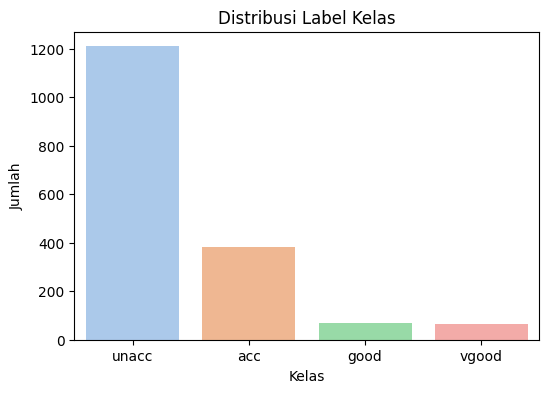

In [7]:
# 3. Melihat distribusi kelas (label target)
print("\nDistribusi target class:")
print(data_car['class'].value_counts())

# Visualisasi distribusi kelas
plt.figure(figsize=(6,4))
sns.countplot(data=data_car, x='class', palette='pastel', order=data_car['class'].value_counts().index)
plt.title('Distribusi Label Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-8-4075d08a2d52>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_car, x=col, palette='Set2', order=data_car[col].value_counts().index)


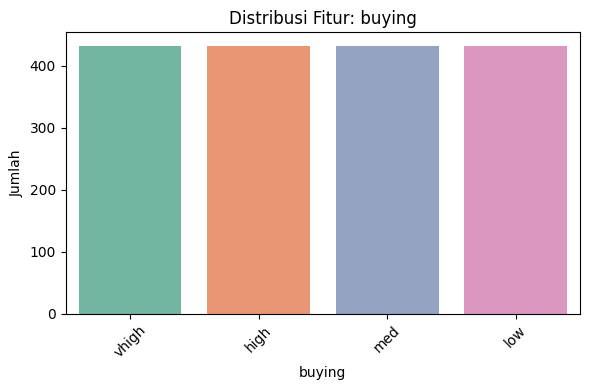

<ipython-input-8-4075d08a2d52>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_car, x=col, palette='Set2', order=data_car[col].value_counts().index)


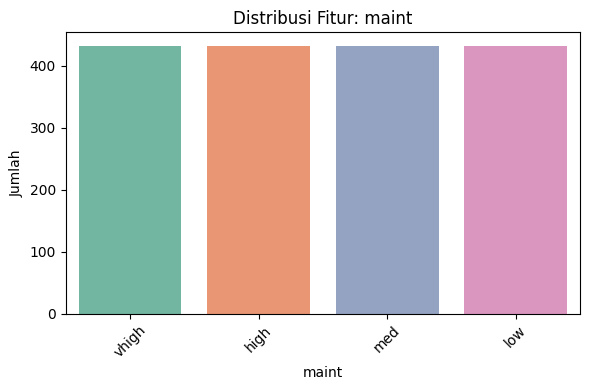

<ipython-input-8-4075d08a2d52>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_car, x=col, palette='Set2', order=data_car[col].value_counts().index)


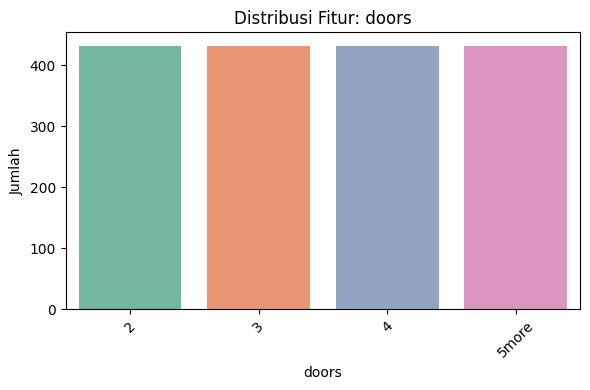

<ipython-input-8-4075d08a2d52>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_car, x=col, palette='Set2', order=data_car[col].value_counts().index)


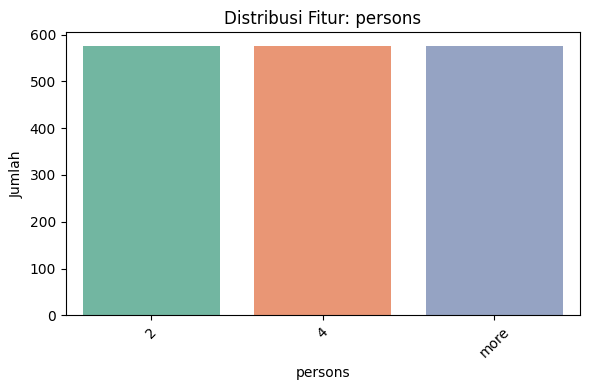

<ipython-input-8-4075d08a2d52>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_car, x=col, palette='Set2', order=data_car[col].value_counts().index)


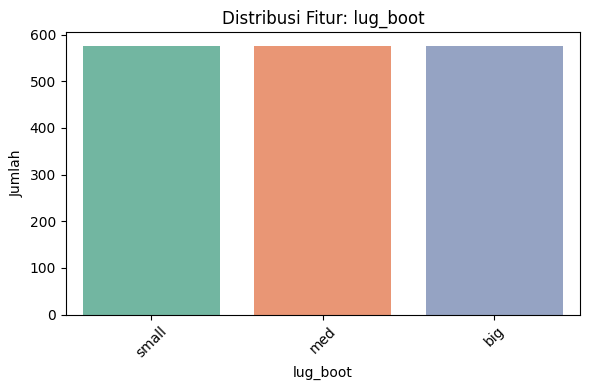

<ipython-input-8-4075d08a2d52>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_car, x=col, palette='Set2', order=data_car[col].value_counts().index)


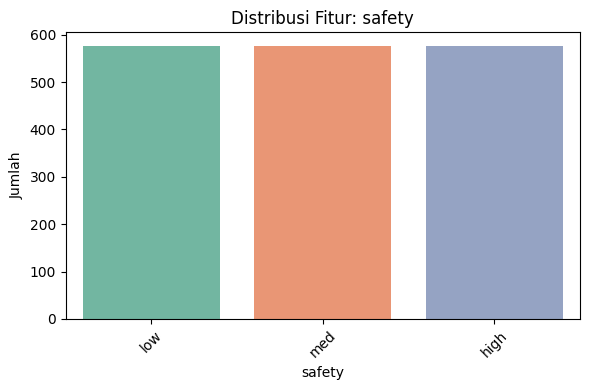

In [8]:
# 4. Visualisasi distribusi fitur kategorikal
categorical_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data_car, x=col, palette='Set2', order=data_car[col].value_counts().index)
    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Contoh tabulasi silang antara safety dan class:
class   acc  good  unacc  vgood
safety                         
high    204    30    277     65
low       0     0    576      0
med     180    39    357      0


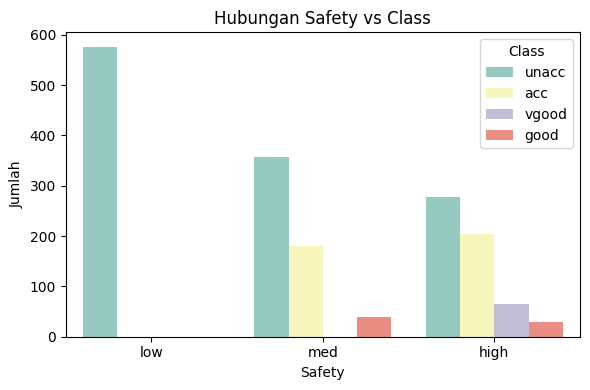

In [9]:
# 5. Crosstab antara fitur penting dan target
print("\nContoh tabulasi silang antara safety dan class:")
print(pd.crosstab(data_car['safety'], data_car['class']))

# Visualisasi hubungan fitur terhadap label (opsional)
plt.figure(figsize=(6,4))
sns.countplot(data=data_car, x='safety', hue='class', palette='Set3')
plt.title('Hubungan Safety vs Class')
plt.xlabel('Safety')
plt.ylabel('Jumlah')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

###  Kesimpulan

1. **Struktur Dataset**
   - Dataset terdiri dari **1.728 baris** dan **7 kolom**.
   - Semua kolom bertipe kategorikal (string), yang sesuai dengan jenis data pada dataset evaluasi mobil.

2. **Kebersihan Data**
   - Tidak ditemukan **nilai kosong (missing values)** pada dataset.
   - Ini menunjukkan bahwa data sudah cukup bersih dan siap digunakan untuk tahap selanjutnya.

3. **Distribusi Label (class)**
   - Terdapat ketidakseimbangan pada distribusi kelas target:
     - `unacc`: jumlah terbanyak
     - `vgood` dan `good`: jumlah sangat sedikit
   - Ketidakseimbangan ini perlu diperhatikan saat melakukan pelatihan model.

4. **Distribusi Fitur Kategorikal**
   - Setiap fitur seperti `buying`, `maint`, `doors`, `persons`, `lug_boot`, dan `safety` memiliki nilai kategori yang merata dan konsisten.
   - Tidak ditemukan nilai yang aneh atau tidak sesuai.

5. **Insight Awal dari Visualisasi**
   - Fitur `safety` terlihat memiliki hubungan kuat terhadap label `class`.
     - Misalnya, mobil dengan `safety` tinggi cenderung memiliki label `vgood` atau `good`.
   - Fitur seperti `buying` dan `maint` juga menunjukkan variasi terhadap label, namun tidak sejelas `safety`.

6. **Rekomendasi Awal**
   - Karena semua fitur bersifat kategorikal, pemrosesan lebih lanjut seperti encoding dibutuhkan sebelum masuk ke tahap modeling.
   - Perlu pertimbangan teknik balancing data (seperti SMOTE atau class weight) jika model menunjukkan bias terhadap kelas mayoritas.


## Data Preparation

In [10]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# # 1. Load ulang data jika diperlukan
# column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# df = pd.read_csv('car.data', names=column_names)

# 2. Label Encoding untuk semua kolom kategorikal
encoder = LabelEncoder()
data_car_encoded = data_car.apply(encoder.fit_transform)

# 3. Pisahkan fitur dan target
X = data_car_encoded.drop('class', axis=1)
y = data_car_encoded['class']

# 4. Bagi data menjadi data latih dan uji (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# # 5. (Opsional) Penyeimbangan data menggunakan SMOTE
# # Ini dilakukan hanya pada data latih agar tidak mengganggu distribusi data uji
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Cek hasil balancing (jumlah sampel per kelas)
print("Distribusi kelas sebelum balancing:")
print(y_train.value_counts())
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_train_bal).value_counts())

Distribusi kelas sebelum balancing:
class
2    847
0    269
1     48
3     45
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
class
2    847
0    847
1    847
3    847
Name: count, dtype: int64


### ✅ Kesimpulan Data Preparation

Pada tahap data preparation, dilakukan beberapa proses penting agar dataset siap digunakan untuk pelatihan model machine learning. Seluruh fitur kategorikal telah dikonversi ke bentuk numerik menggunakan teknik label encoding. Data kemudian dibagi menjadi data latih dan data uji dengan proporsi 70:30 secara stratifikasi untuk menjaga distribusi kelas.

Selain itu, diterapkan teknik SMOTE pada data latih untuk mengatasi ketidakseimbangan kelas, sehingga model nantinya dapat belajar secara lebih adil terhadap semua kategori. Dengan persiapan ini, data telah berada dalam kondisi yang ideal untuk proses modeling selanjutnya.


# Modelling

## Membangun Model 1 (Decision Tree)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model pada data hasil SMOTE
dt_model.fit(X_train_bal, y_train_bal)

# Prediksi pada data uji
dt_predictions = dt_model.predict(X_test)

# Evaluasi performa
print("=== Decision Tree Classifier ===")
print("Akurasi:", accuracy_score(y_test, dt_predictions))
print("Laporan klasifikasi:")
print(classification_report(y_test, dt_predictions))

=== Decision Tree Classifier ===
Akurasi: 0.928709055876686
Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       115
           1       0.94      0.76      0.84        21
           2       0.95      0.97      0.96       363
           3       1.00      0.90      0.95        20

    accuracy                           0.93       519
   macro avg       0.94      0.87      0.90       519
weighted avg       0.93      0.93      0.93       519



## Membangun Model 2 (Random Forest)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada data hasil SMOTE
rf_model.fit(X_train_bal, y_train_bal)

# Prediksi pada data uji
rf_predictions = rf_model.predict(X_test)

# Evaluasi performa
print("=== Random Forest Classifier ===")
print("Akurasi:", accuracy_score(y_test, rf_predictions))
print("Laporan klasifikasi:")
print(classification_report(y_test, rf_predictions))

=== Random Forest Classifier ===
Akurasi: 0.9672447013487476
Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.94      0.76      0.84        21
           2       0.99      0.98      0.99       363
           3       1.00      0.95      0.97        20

    accuracy                           0.97       519
   macro avg       0.96      0.91      0.93       519
weighted avg       0.97      0.97      0.97       519



### 🔍 Modeling

Pada tahap ini dilakukan proses pelatihan dua model machine learning, yaitu:

1. **Decision Tree Classifier**
2. **Random Forest Classifier**

Kedua model dilatih menggunakan data latih hasil oversampling dengan SMOTE, lalu diuji menggunakan data uji yang telah dipisahkan sebelumnya.

- **Decision Tree** merupakan model sederhana dan mudah dipahami, tetapi rentan overfitting.
- **Random Forest** adalah model ensemble yang lebih stabil dan cenderung memberikan akurasi yang lebih tinggi.

Hasil evaluasi dari kedua model ditampilkan menggunakan metrik akurasi, precision, recall, dan F1-score. Model dengan performa terbaik akan dipilih untuk digunakan pada tahap akhir.


# Evaluation

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

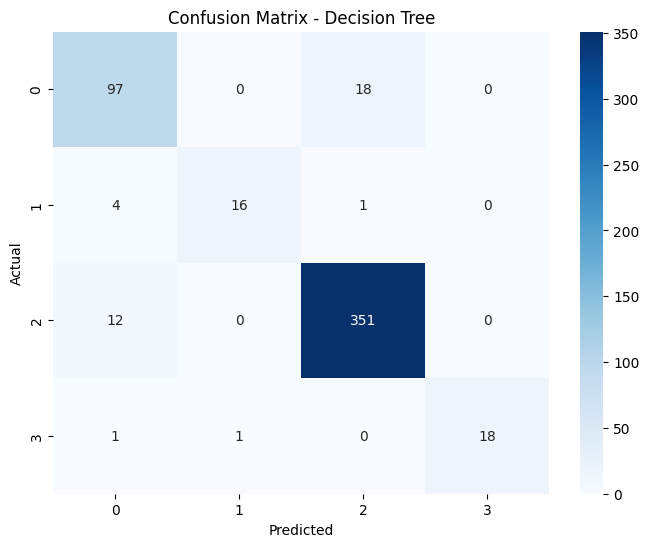

In [17]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

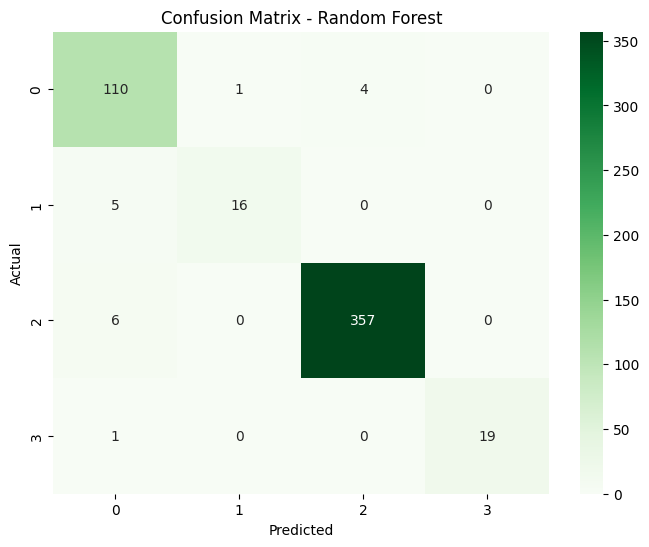

In [16]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Greens', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 📊 Evaluation

Pada tahap ini, model dievaluasi menggunakan metrik klasifikasi seperti **accuracy**, **precision**, **recall**, dan **F1-score**.  
Hasil evaluasi ditampilkan dalam bentuk classification report dan confusion matrix.

- **Decision Tree** menunjukkan hasil yang baik namun masih menghasilkan beberapa kesalahan klasifikasi antar kelas.
- **Random Forest** memberikan performa yang lebih stabil dan akurat, sehingga dipilih sebagai model terbaik.

Confusion matrix digunakan untuk memvisualisasikan distribusi prediksi model terhadap data sebenarnya.
